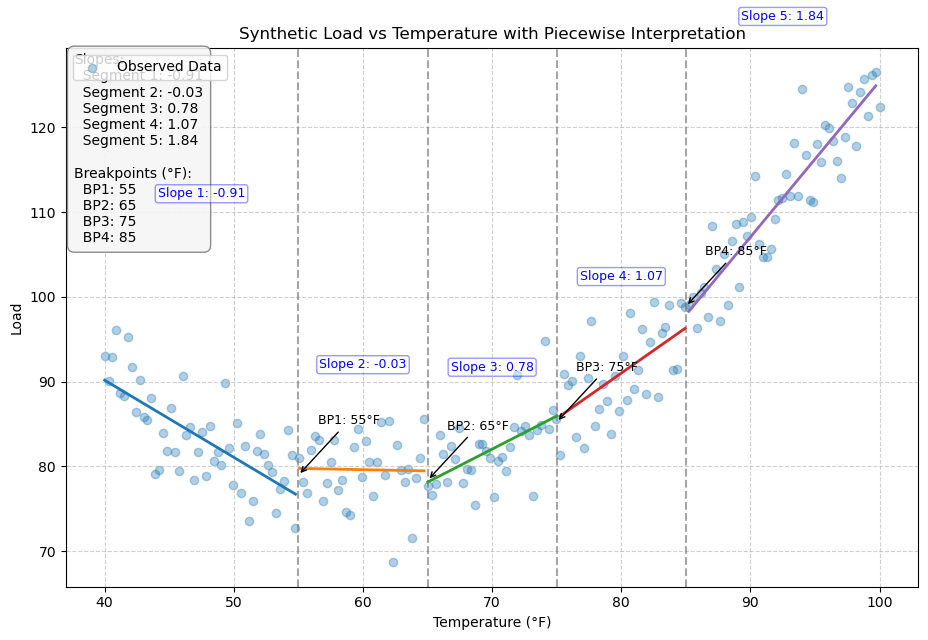

In [15]:
#chapter 1 MATPLOTLIB
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Synthetic temperature data
x = np.linspace(40, 100, 200)

# Synthetic load with non-linearity
y = (
    40
    + 0.6 * x
    + 0.03 * (x - 70)**2
    + np.random.normal(0, 4, len(x))
)

# Define breakpoints (°F)
breaks = np.array([40, 55, 65, 75, 85, 100])

#computing slpoes per segment
slopes = []
for i in range(len(breaks) - 1):
    mask = (x >= breaks[i]) & (x < breaks[i+1])
    coef = np.polyfit(x[mask], y[mask], 1)
    slopes.append(np.round(coef[0], 2))

slopes = np.array(slopes)

plt.figure(figsize=(11, 7))

plt.scatter(x, y, alpha=0.35, label="Observed Data")

#vertical dashed lines
for bp in breaks[1:-1]:
    plt.axvline(x=bp, color='gray', linestyle='--', alpha=0.7)

#plotting piecewise trend lines
for i in range(len(breaks) - 1):
    mask = (x >= breaks[i]) & (x < breaks[i+1])
    y_fit = slopes[i] * x[mask] + (np.mean(y[mask]) - slopes[i] * np.mean(x[mask]))
    plt.plot(x[mask], y_fit, linewidth=2)

#text box (with slopes + breakpoints)
textstr = (
    "Slopes:\n"
    f"  Segment 1: {slopes[0]}\n"
    f"  Segment 2: {slopes[1]}\n"
    f"  Segment 3: {slopes[2]}\n"
    f"  Segment 4: {slopes[3]}\n"
    f"  Segment 5: {slopes[4]}\n\n"
    "Breakpoints (°F):\n"
    f"  BP1: {breaks[1]}\n"
    f"  BP2: {breaks[2]}\n"
    f"  BP3: {breaks[3]}\n"
    f"  BP4: {breaks[4]}"
)

plt.gca().text(
    0.01, 0.99, textstr,
    transform=plt.gca().transAxes,
    fontsize=10,
    va='top',
    bbox=dict(boxstyle="round,pad=0.5", fc="#f5f5f5", ec="gray", alpha=0.9)
)
#slope labels
midpoints = [(breaks[i] + breaks[i+1]) / 2 for i in range(len(slopes))]

for i, mid in enumerate(midpoints):
    y_mid = slopes[i] * mid + (np.mean(y) - slopes[i] * np.mean(x))
    plt.text(
        mid, y_mid,
        f"Slope {i+1}: {slopes[i]}",
        fontsize=9,
        color="blue",
        ha="center",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="blue", alpha=0.4)
    )
#arrow annotations for internal breakpoints
for i, bp in enumerate(breaks[1:-1], start=1):
    y_bp = np.interp(bp, x, y)
    plt.annotate(
        f"BP{i}: {bp}°F",
        xy=(bp, y_bp),
        xytext=(bp + 1.5, y_bp + 6),
        arrowprops=dict(arrowstyle="->", color="black"),
        fontsize=9
    )

#final labels and showing the plots
plt.xlabel("Temperature (°F)")
plt.ylabel("Load")
plt.title("Synthetic Load vs Temperature with Piecewise Interpretation")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()